# Exploring Dandiset 001174: Calcium imaging in SMA and M1 of macaques

**Important note:** This notebook was AI-generated and has not been fully verified.
Please be cautious when interpreting the code or results.

## Overview of the Dandiset

This notebook provides an exploratory analysis of Dandiset 001174, which contains calcium imaging data from the supplementary motor area (SMA) and primary motor area (M1) of macaque monkeys. The data were acquired using one-photon calcium imaging with a microendoscope, focusing on neuronal activity during rest and arm-reaching tasks.

The Dandiset can be found at: [https://dandiarchive.org/dandiset/001174/0.250331.2218](https://dandiarchive.org/dandiset/001174/0.250331.2218).

## What this notebook will cover

1.  Loading the Dandiset metadata using the DANDI API.
2.  Exploring the assets within the Dandiset.
3.  Loading an NWB file and examining its contents.
4.  Visualizing calcium imaging data from the NWB file.
5.  Summarizing findings and suggesting potential future analyses.

## Required Packages

The following packages are required to run this notebook. Please ensure that they are installed in your environment.

-   pynwb
-   h5py
-   remfile
-   matplotlib
-   seaborn
-   itertools
-   dandi.dandiapi

## Loading the Dandiset using the DANDI API

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001174", "0.250331.2218")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Calcium imaging in SMA and M1 of macaques
Dandiset URL: https://dandiarchive.org/dandiset/001174/0.250331.2218

First 5 assets:
- sub-V/sub-V_ses-20230309T110929_ophys.nwb (ID: a2b04c7f-f671-4a55-ac36-5df4d842dfc2)
- sub-Q/sub-Q_ophys.nwb (ID: de07db56-e7f3-4809-9972-755c51598e8d)
- sub-Q/sub-Q_ses-20220922T131747_ophys.nwb (ID: ac161d0e-7642-48bd-9bef-8eff59319d48)
- sub-Q/sub-Q_ses-20221003T131952_ophys.nwb (ID: 9c3678d5-22c3-402c-8cd4-6bc38c4d61e3)
- sub-Q/sub-Q_ses-20221028T121142_ophys.nwb (ID: b4e6bbf7-0564-4628-b8f0-680fd9b8d4ea)


## Loading an NWB file and examining its contents

We will load the NWB file `sub-Q/sub-Q_ophys.nwb` for this analysis.

In [2]:
import pynwb
import h5py
import remfile

# Load
url = "https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file, mode='r')
nwb = io.read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")

Session description: Calcium imaging in SMA during the spontaneous condition
Identifier: 5c2c4bb2-8310-4e0e-ae01-fd872edba928
Session start time: 2022-09-15 13:16:33.129000+00:00


The URL for the asset is: `https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/`

You can explore this file on neurosift using this link:  [https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/de07db56-e7f3-4809-9972-755c51598e8d/download/&dandisetId=001174&dandisetVersion=draft)

## Contents of the NWB file

Here's a summary of the key data interfaces in the NWB file:

```
NWBFile
├── acquisition
│   └── OnePhotonSeries
├── processing
│   └── ophys
│       ├── EventAmplitude
│       ├── Fluorescence
│       │   └── RoiResponseSeries
│       └── ImageSegmentation
│           └── PlaneSegmentation
├── devices
│   └── Miniscope
└── imaging_planes
    └── ImagingPlane
```

### Accessing imaging data

Shape of OnePhotonSeries data: (6041, 320, 200)


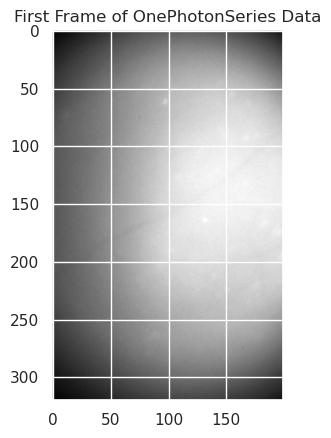

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Access the OnePhotonSeries data
OnePhotonSeries = nwb.acquisition["OnePhotonSeries"]
data = OnePhotonSeries.data
print(f"Shape of OnePhotonSeries data: {data.shape}")

# Display the first frame of the imaging data
first_frame = data[0, :, :]
plt.imshow(first_frame, cmap='gray')
plt.title('First Frame of OnePhotonSeries Data')
plt.show()

### Accessing event amplitude data

Shape of EventAmplitude data: (6041, 40)


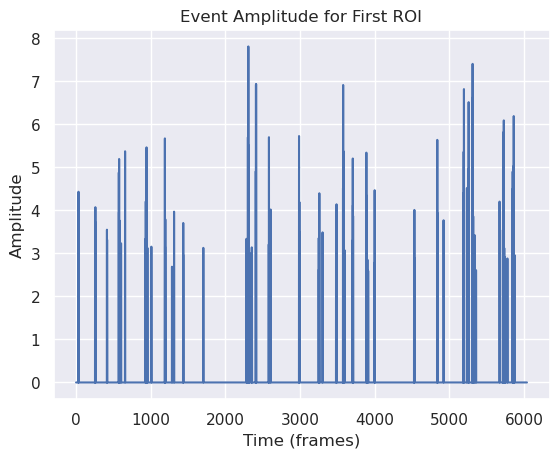

In [4]:
# Access the EventAmplitude data
ophys = nwb.processing["ophys"]
EventAmplitude = ophys.data_interfaces["EventAmplitude"]
event_amplitude_data = EventAmplitude.data
print(f"Shape of EventAmplitude data: {event_amplitude_data.shape}")

# Display event amplitude data for the first ROI over time
first_roi_amplitudes = event_amplitude_data[:, 0]
plt.plot(first_roi_amplitudes)
plt.title('Event Amplitude for First ROI')
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.show()

### Accessing fluorescence data

Shape of RoiResponseSeries data: (6041, 40)


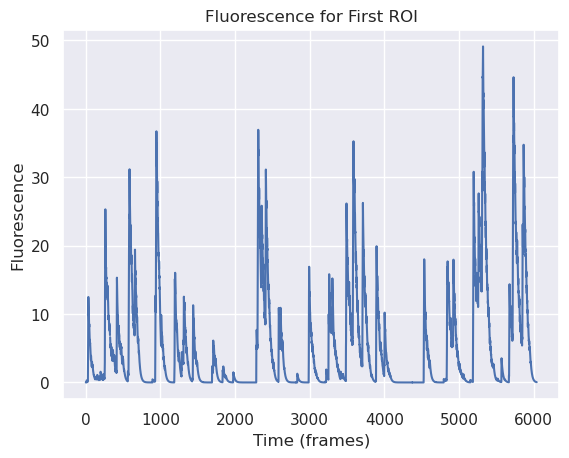

In [5]:
# Access the RoiResponseSeries data
Fluorescence = ophys.data_interfaces["Fluorescence"]
RoiResponseSeries = Fluorescence.roi_response_series["RoiResponseSeries"]
roi_response_data = RoiResponseSeries.data
print(f"Shape of RoiResponseSeries data: {roi_response_data.shape}")

# Display fluorescence data for the first ROI over time
first_roi_fluorescence = roi_response_data[:, 0]
plt.plot(first_roi_fluorescence)
plt.title('Fluorescence for First ROI')
plt.xlabel('Time (frames)')
plt.ylabel('Fluorescence')
plt.show()

### Accessing image masks from PlaneSegmentation

Shape of image_masks data: (40, 292, 179)
Type of image_masks[0]: <class 'numpy.ndarray'>
Shape of image_masks[0]: (292, 179)
Content of image_masks[0]: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


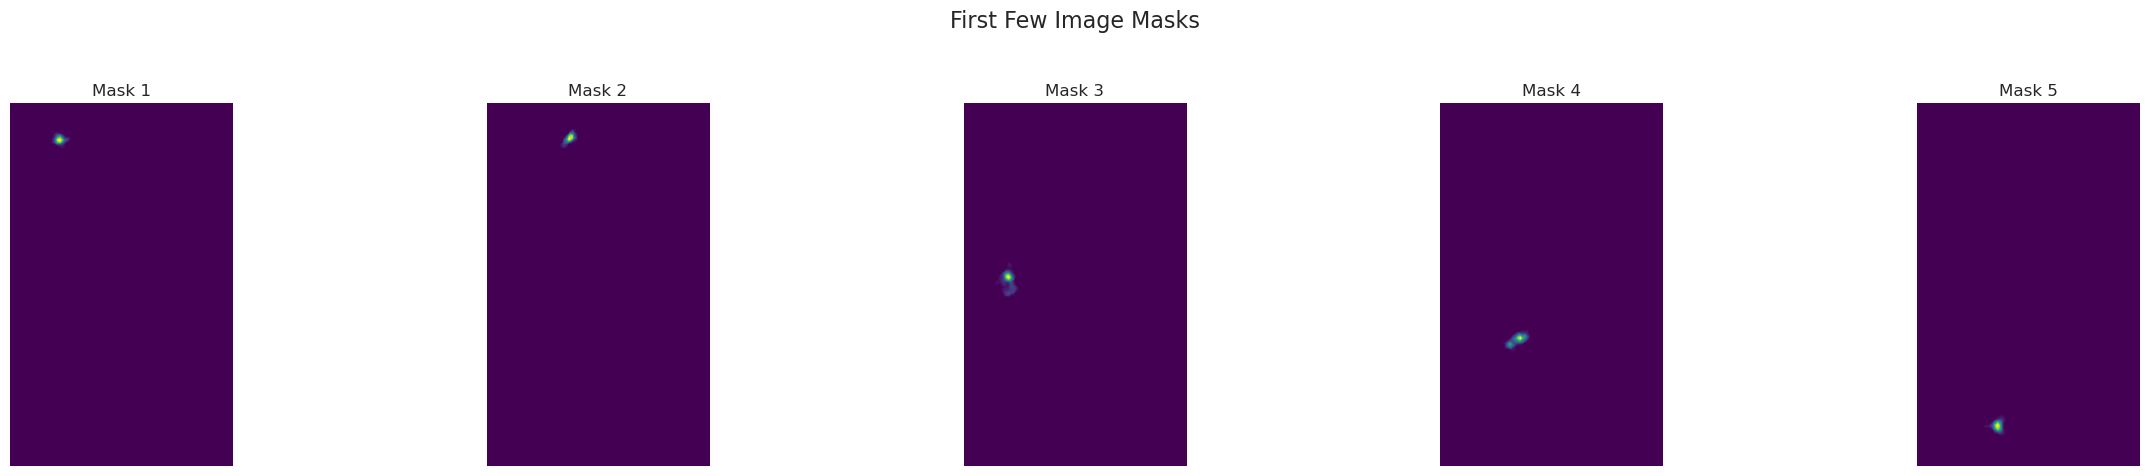

In [6]:
# Access the PlaneSegmentation data
ImageSegmentation = ophys.data_interfaces["ImageSegmentation"]
PlaneSegmentation = ImageSegmentation.plane_segmentations["PlaneSegmentation"]
image_masks = PlaneSegmentation.image_mask
print(f"Shape of image_masks data: {image_masks.shape}")

# Inspect the structure of the first image mask
print(f"Type of image_masks[0]: {type(image_masks[0])}")
print(f"Shape of image_masks[0]: {image_masks[0].shape}")
print(f"Content of image_masks[0]: {image_masks[0]}")

# Display the first 5 image masks
num_masks = min(5, image_masks.shape[0])  # Displaying a maximum of 5 masks
fig, axes = plt.subplots(1, num_masks, figsize=(5 * num_masks, 5))  # Adjust figure size based on number of masks
fig.suptitle('First Few Image Masks', fontsize=16)  # Overall title for the figure

for i in range(num_masks):
    # Each image_mask is a collection of (x, y, value) for the mask
    mask = image_masks[i]
    
    # Determine the dimensions of the image based on your data or assume a default
    img_width = 179 #320
    img_height = 292 #200

    # Create an empty image to place the mask on
    img = np.zeros((img_height, img_width))

    # Fill in the pixel values based on the mask
    for y in range(img_height):
        for x in range(img_width):
            img[y, x] = mask[y, x]

    ax = axes[i]
    # Display the image
    im = ax.imshow(img, cmap='viridis')
    ax.set_title(f'Mask {i+1}')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for overall title
plt.show()

## Summary and possible future directions

This notebook has provided a basic introduction to exploring the Dandiset 001174 and its NWB files. We have shown how to load the Dandiset metadata, access imaging data, event amplitude data, fluorescence data, and image masks.

Possible future directions for analysis include:

1.  Investigating the relationships between event amplitudes and fluorescence signals.
2.  Performing more advanced signal processing and feature extraction on the calcium imaging data.
3.  Analyzing the spatial distribution and co-activation patterns of neurons.
4.  Comparing neuronal activity during rest and arm-reaching tasks.